# Research for TA and Testing

In [79]:
import pandas as pd
import ccxt
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
import tensorflow as tf
import joblib


# Data Collection

,date,open,high,low,close,volume,datetime
0,1577854800000,7198.52,7198.52,7198.52,7198.52,0.060000,2020-01-01 05:00:00
1,1577855100000,7200.59,7200.59,7200.59,7200.59,0.105825,2020-01-01 05:05:00
2,1577855400000,7200.00,7200.00,7200.00,7200.00,0.041522,2020-01-01 05:10:00
3,1577855700000,7200.00,7200.00,7197.94,7198.20,0.176478,2020-01-01 05:15:00
4,1577856000000,7198.20,7198.20,7198.20,7198.20,0.000000,2020-01-01 05:20:00
...,...,...,...,...,...,...,...
995,1578153300000,7309.43,7309.43,7309.43,7309.43,0.000000,2020-01-04 15:55:00
996,1578153600000,7310.24,7310.24,7295.39,7295.39,0.600828,2020-01-04 16:00:00
997,1578153900000,7302.63,7302.63,7302.63,7302.63,0.001388,2020-01-04 16:05:00
998,1578154200000,7302.63,7302.63,7302.63,7302.63,0.000000,2020-01-04 16:10:00


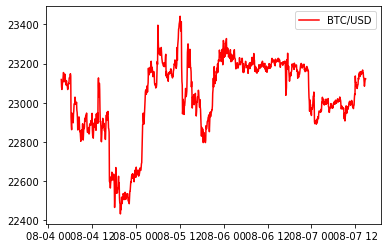

In [3]:
from datetime import datetime
from datetime import timedelta
exchange = ccxt.binanceus()

def get_data(start_date = None, timeframe = '5m'):
    data = exchange.fetch_ohlcv('BTC/USD', timeframe, limit=1000, since=start_date)
    df = pd.DataFrame(data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    df['datetime'] = pd.to_datetime(df['date'], unit='ms')
    return df
df = get_data()
plt.plot(df['datetime'], df['close'], color = 'red')
plt.legend(['BTC/USD'])

# Fetch data since 1/1/2020 

def convert_date(x): return datetime.strptime(x, '%Y-%m-%d')


n = convert_date('2020-01-01')
n = int(n.timestamp()) * 1000
df = get_data(start_date=n)

df


In [4]:
df = get_data()
MACD = ta.macd(df['close'], n_fast=12, n_slow=26, n_sign=9)
MACD

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
995,9.396000,-11.359885,20.755885
996,6.671970,-11.267132,17.939102
997,5.418192,-10.016728,15.434920
998,5.055395,-8.303620,13.359015


In [5]:
df = get_data()
ta.stochrsi(df['close'], n=14)

,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
995,1.273056e-14,0.472638
996,7.386363e+00,2.462121
997,1.916732e+01,8.851226
998,3.409194e+01,20.215204


In [6]:
df = get_data()
bollinger = ta.bbands(df['close'], n=20, k=2)
bollinger

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,23053.857743,23089.960,23126.062257,0.312710,0.668272
...,...,...,...,...,...
995,23072.676395,23119.778,23166.879605,0.407457,0.124556
996,23075.615363,23109.740,23143.864637,0.295327,0.398167
997,23078.176369,23106.650,23135.123631,0.246454,0.642764
998,23079.638856,23105.836,23132.033144,0.226758,0.833701


Text(0.5, 1.0, 'STOCHRSI')

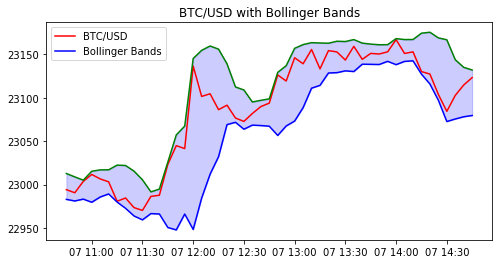

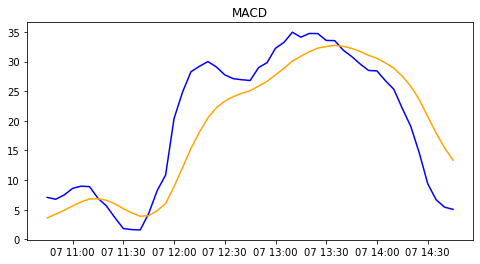

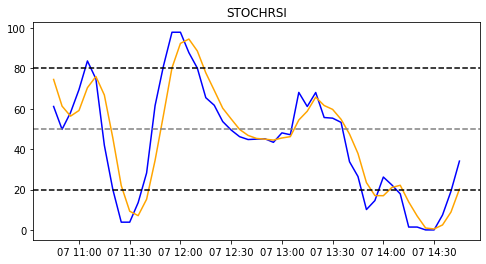

In [7]:
df = get_data()
MACD = ta.macd(df['close'], n_fast=12, n_slow=26, n_sign=9)
stochrsi = ta.stochrsi(df['close'], n=14)
bollinger = ta.bbands(df['close'], n=20, k=2)

plt.figure(figsize=(8, 4))
plt.plot(df['datetime'].iloc[-50:-1], df['close'].iloc[-50:-1], color='red')
plt.plot(df['datetime'].iloc[-50:-1],
         bollinger['BBL_5_2.0'].iloc[-50:-1], color='blue')
plt.plot(df['datetime'].iloc[-50:-1],
         bollinger['BBU_5_2.0'].iloc[-50:-1], color='green')
plt.fill_between(df['datetime'].iloc[-50:-1], bollinger['BBL_5_2.0'].iloc[-50:-1], bollinger['BBU_5_2.0'].iloc[-50:-1], color='blue', alpha=0.2)
plt.legend(['BTC/USD', 'Bollinger Bands'])
plt.title('BTC/USD with Bollinger Bands')

plt.figure(figsize=(8, 4))
plt.plot(df['datetime'].iloc[-50:-1], MACD['MACD_12_26_9'].iloc[-50:-1], color='blue')
plt.plot(df['datetime'].iloc[-50:-1], MACD['MACDs_12_26_9'].iloc[-50:-1], color='orange')
plt.title('MACD')

plt.figure(figsize=(8, 4))
plt.plot(df['datetime'].iloc[-50:-1],
         stochrsi['STOCHRSIk_14_14_3_3'].iloc[-50:-1], color='blue')
plt.plot(df['datetime'].iloc[-50:-1],
         stochrsi['STOCHRSId_14_14_3_3'].iloc[-50:-1], color='orange')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=80, color='black', linestyle='--')
plt.axhline(y=20, color='black', linestyle='--')
plt.title('STOCHRSI')


# Ordering Algorithms

The strategy that will be implemented will be MACD focused with the confirmation from the STOCHRSI.  
<br>
If the difference of the MACD is positive, the strategy will be to buy the stock if the STOCHRSI is above the 50% level, indicating a strong trend. This will trigger an OCO order.
<br>
The stop loss will be set to -0.2% of the current price. and the Take-Profit will be 0.5% of the current price
<br>

# ML Integration
- Predict how much higher percentage the stock will be in 30 minutes.
    - Uses a Random Forest Classifier to predict the percentage increases.
    - Uses MACD, STOCHRSI, Volume, Bollinger Bands, and Close Price as features for linear regression to predict the next 30 minutes.


In [8]:
df = get_data()
df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
                     n_sign=9)['MACDh_12_26_9']
df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']
df['Next-Close'] = df['close'].shift(-6) # shift(-6) is 30 minutes in the future
df.dropna(inplace=True)

df

,date,open,high,low,close,volume,datetime,MACD,STOCHRSIk,STOCHRSId,BandWidth,Next-Close
33,1659594000000,22931.15,22940.02,22842.40,22884.06,69.918190,2022-08-04 06:20:00,-20.659509,2.751793e+01,60.851260,2.026741,22897.90
34,1659594300000,22881.63,22883.89,22829.01,22862.67,54.278322,2022-08-04 06:25:00,-27.510936,4.736952e-15,29.456396,2.171171,22941.66
35,1659594600000,22861.61,22947.14,22820.00,22947.14,58.264773,2022-08-04 06:30:00,-24.852320,1.249841e+01,13.338780,1.699658,22957.46
36,1659594900000,22939.04,22993.13,22910.00,22931.37,48.076308,2022-08-04 06:35:00,-22.712802,2.393633e+01,12.144915,0.557692,22994.08
37,1659595200000,22930.96,22938.80,22885.31,22935.50,63.270608,2022-08-04 06:40:00,-19.689063,3.592490e+01,24.119883,0.572465,22993.98
...,...,...,...,...,...,...,...,...,...,...,...,...
989,1659880800000,23153.02,23171.94,23150.77,23167.02,20.860368,2022-08-07 14:00:00,-2.116519,2.619946e+01,16.942378,0.129562,23084.41
990,1659881100000,23167.02,23167.02,23138.28,23151.08,6.193238,2022-08-07 14:05:00,-3.019487,2.230645e+01,21.015332,0.108743,23102.79
991,1659881400000,23151.36,23157.04,23140.72,23152.98,7.923028,2022-08-07 14:10:00,-3.577552,1.784672e+01,22.117540,0.106071,23114.78
992,1659881700000,23151.61,23156.56,23115.42,23130.23,9.647723,2022-08-07 14:15:00,-5.455134,1.417913e+00,13.857026,0.203844,23123.32


In [9]:
# df = get_data()
# df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
#                      n_sign=9)['MACDh_12_26_9']
# df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
# df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
# df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']

# df



# # shift(-6) is 30 minutes in the future
# df['Next-Close'] = df['close'].shift(-6)
# df.dropna(inplace=True)
# features = df[['open', 'high', 'low', 'MACD', 'close','STOCHRSIk', 'STOCHRSId',
#                'BandWidth', 'volume']]
# labels = df['Next-Close']

# data = pd.concat([features, labels], axis=1)
# train_data = data.sample(frac=0.8, random_state=0)
# test_data = data.drop(train_data.index)
# train_features = train_data.drop('Next-Close', axis=1)
# train_labels = train_data['Next-Close']
# test_features = test_data.drop('Next-Close', axis=1)
# test_labels = test_data['Next-Close']
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=1, input_shape=[len(train_features.columns)])
# ])
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(train_features, train_labels, epochs=500,
#             validation_split=0.2, verbose=1)
# predictions = model.predict(test_features)

# model.save('btc_model.h5')
# # model = tf.keras.models.load_model('myModel.h5')


In [10]:
from sklearn.metrics import mean_squared_error
# import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# print(model.evaluate(test_features, test_labels))
# print('RMSE: ', np.sqrt(mean_squared_error(test_labels, predictions)))
# print('MAE: ', mean_absolute_error(test_labels, predictions))
# print('R2: ', r2_score(test_labels, predictions))


In [83]:
from tabnanny import verbose
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def convert_date(x): return int(datetime.strptime(x, '%Y-%m-%d').timestamp()*1000)
def convert_date_with_time(x): return int(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp()*1000)

df = get_data()
df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26, n_sign=9)['MACDh_12_26_9']
df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']

df['FIVE_CLOSE'] = df['close'].shift(-1)
df['TEN_CLOSE'] = df['close'].shift(-2)
df['TWENTY_CLOSE'] = df['close'].shift(-4)
SHIFT = -6
df['THIRTY_CLOSE'] = df['close'].shift(SHIFT) # shift(-6) is 30 minutes in the future
df.dropna(inplace=True)
SPLIT_RATIO = 0.6

features = np.array(df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
labels = np.array(((df['THIRTY_CLOSE']-df['close'])/df['close'])*100)

five_Labels = np.array(((df['FIVE_CLOSE']-df['close'])/df['close'])*100)
ten_Labels = np.array(((df['TEN_CLOSE']-df['close'])/df['close'])*100)
twenty_Labels = np.array(((df['TWENTY_CLOSE']-df['close'])/df['close'])*100)
thirty_Labels = np.array(((df['THIRTY_CLOSE']-df['close'])/df['close'])*100)

train_features = features[:int(SPLIT_RATIO*len(features))]
test_features = features[int(SPLIT_RATIO*len(features)):]

train_labels = labels[:int(SPLIT_RATIO*len(features))]
test_labels = labels[int(SPLIT_RATIO*len(features)):]
# Create different models for each label
five_train_labels = five_Labels[:int(SPLIT_RATIO*len(features))]
five_test_labels = five_Labels[int(SPLIT_RATIO*len(features)):]
ten_train_labels = ten_Labels[:int(SPLIT_RATIO*len(features))]
ten_test_labels = ten_Labels[int(SPLIT_RATIO*len(features)):]
twenty_train_labels = twenty_Labels[:int(SPLIT_RATIO*len(features))]
twenty_test_labels = twenty_Labels[int(SPLIT_RATIO*len(features)):]
thirty_train_labels = thirty_Labels[:int(SPLIT_RATIO*len(features))]
thirty_test_labels = thirty_Labels[int(SPLIT_RATIO*len(features)):]


# Create a model for each label
five_model = RandomForestRegressor(n_estimators=100, random_state=0)
ten_model = RandomForestRegressor(n_estimators=100, random_state=0)
twenty_model = RandomForestRegressor(n_estimators=100, random_state=0)
thirty_model = RandomForestRegressor(n_estimators=100, random_state=0)


# Train the models
five_model.fit(train_features, train_labels)
ten_model.fit(train_features, ten_train_labels)
twenty_model.fit(train_features, twenty_train_labels)
thirty_model.fit(train_features, thirty_train_labels)


# Test the models
five_predictions = five_model.predict(test_features)
ten_predictions = ten_model.predict(test_features)
twenty_predictions = twenty_model.predict(test_features)
thirty_predictions = thirty_model.predict(test_features)





In [85]:
joblib.dump(five_model, "./five_model.joblib")
joblib.dump(ten_model, "./ten_model.joblib")
joblib.dump(twenty_model, "./twenty_model.joblib")
joblib.dump(thirty_model, "./thirty_model.joblib")

['./thirty_model.joblib']

In [73]:
print('Five Model Accuracy: ', mean_squared_error(test_labels, five_predictions))
print('Ten Model Accuracy: ', mean_squared_error(
    ten_test_labels, ten_predictions))
print('Twenty Model Accuracy: ', mean_squared_error(
    twenty_test_labels, twenty_predictions))
print('Thirty Model Accuracy: ', mean_squared_error(
    thirty_test_labels, thirty_predictions))


Five Model Accuracy:  0.07369856893711792
Ten Model Accuracy:  0.021635558026341782
Twenty Model Accuracy:  0.0497311114129669
Thirty Model Accuracy:  0.07369856893711792


In [ ]:
five_model = ten_model = twenty_model = thirty_model = None

In [77]:
# Use clf to predict the next close price
def predict_next_close(df):
    df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
                        n_sign=9)['MACDh_12_26_9']
    df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
    df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
    df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']
    df.dropna(inplace=True)
    df['FIVE_CLOSE'] = df['close'].shift(-1)
    df['TEN_CLOSE'] = df['close'].shift(-2)
    df['TWENTY_CLOSE'] = df['close'].shift(-4)
    df['THIRTY_CLOSE'] = df['close'].shift(-6)

    five_model = joblib.load("./five_model.joblib")
    ten_model = joblib.load("./ten_model.joblib")
    twenty_model = joblib.load("./twenty_model.joblib")
    thirty_model = joblib.load("./thirty_model.joblib")


    five_predictions = five_model.predict(df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
    ten_predictions = ten_model.predict(df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
    twenty_predictions = twenty_model.predict(df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
    thirty_predictions = thirty_model.predict(df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
    df['5 Minutes'] = five_predictions
    df['10 Minutes'] = ten_predictions
    df['20 Minutes'] = twenty_predictions
    df['30 Minutes'] = thirty_predictions
    return df


from datetime import datetime

# Fetch data since 1/1/2020
convert_date = lambda x: datetime.strptime(x, '%Y-%m-%d')

n = convert_date('2020-01-01')
n = int(n.timestamp()) * 1000
df = get_data()
predictions = predict_next_close(df)
df.to_csv('predictions.csv')




In [14]:
# model_loss = model.evaluate(test_features, test_labels)
# print(model_loss)


In [15]:
predictions = model.predict(test_features)
pred_result = pd.DataFrame(predictions, columns=['Predictions'])
label_df = pd.DataFrame(test_labels)
label_df.index = pred_result.index
plt.plot(pred_result, color='red')
plt.plot(label_df, color='blue')
plt.title('Close enough')
plt.legend(['Predictions', 'Actual'])
plt.show()


NameError: name 'model' is not defined

In [ ]:
df = get_data()
df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
                        n_sign=9)['MACDh_12_26_9']
df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']

data = pd.concat([df['MACD'], df['STOCHRSIk'], df['STOCHRSId'],
                    df['BandWidth'], df['close'], df['volume']], axis=1)
data.dropna(inplace=True)

new_prediction = model.predict(data)
pred_df = pd.DataFrame(new_prediction, columns=['Predictions'])
pred_df.index = df.index[33:]
data['Prediction'] = pred_df

data

,MACD,STOCHRSIk,STOCHRSId,BandWidth,close,volume,Prediction
33,3.624347,70.291844,61.208957,0.405920,22868.51,14.088083,22868.050781
34,3.471218,66.013515,66.478346,0.218788,22862.17,17.159442,22856.384766
35,2.450320,60.055910,65.453756,0.115093,22852.74,18.630021,22843.722656
36,1.725433,52.067122,59.378849,0.112839,22855.72,11.279478,22843.253906
37,3.398880,62.263667,58.128900,0.250103,22892.84,33.902085,22889.638672
...,...,...,...,...,...,...,...
495,4.797340,87.231881,60.400145,0.823039,22589.75,28.453874,22603.166016
496,12.614897,100.000000,80.376810,1.211726,22669.80,54.806429,22679.845703
497,14.043411,93.631040,93.620974,0.856320,22616.80,30.129605,22612.814453
498,9.751662,79.397543,91.009527,0.770576,22538.59,26.080474,22527.332031


In [ ]:
data['close'].iloc[-1], data['Prediction'].iloc[-1]

(22549.32, 22533.732)